(array([0.00139648, 0.        , 0.00139648, 0.00488768, 0.00069824,
        0.00488768, 0.00209472, 0.00279296, 0.00558592, 0.01326657,
        0.00628416, 0.01187009, 0.01536129, 0.01885249, 0.01187009,
        0.01745601, 0.02024897, 0.02304194, 0.02653314, 0.02164545,
        0.03351554, 0.02723138, 0.04259267, 0.0516698 , 0.03910147,
        0.05655748, 0.05097156, 0.08239238, 0.07122053, 0.09007302,
        0.09915015, 0.11590792, 0.10194311, 0.11171848, 0.13894986,
        0.11311496, 0.15291467, 0.13545865, 0.15081994, 0.19341261,
        0.17386188, 0.18224077, 0.17106892, 0.19620558, 0.19131789,
        0.20667918, 0.2017915 , 0.19480909, 0.19690382, 0.18922317,
        0.20598094, 0.21226511, 0.19969678, 0.18293901, 0.18992141,
        0.16478475, 0.15151818, 0.16269003, 0.14872522, 0.12638153,
        0.12707977, 0.12219208, 0.12777801, 0.10054663, 0.08239238,
        0.07959941, 0.08169414, 0.06912581, 0.05585924, 0.04887683,
        0.04887683, 0.03421378, 0.05027331, 0.03

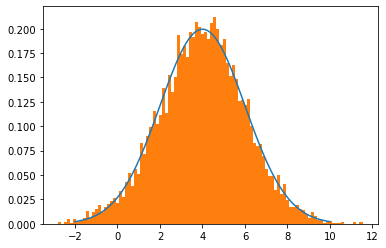

In [20]:
# 使用Metropolis-Hastings对一个复杂的分布进行采样
import numpy as np
import math
import matplotlib.pyplot as plt
import utils    
miu = 4
sigma = 2
def Gaussion(x):

    return 1 / (np.sqrt(2 * math.pi) * sigma) * np.exp(- (x - miu) * (x - miu)/ (2 * sigma * sigma))

x = np.linspace(miu - 3 * sigma,miu + 3 * sigma,100)
plt.plot(x,Gaussion(x))

# 构造建议分布
nums = 10000
count = 0
points = []
# 对初始值x0进行采样,随机采一个服从标准正太分布的样本
point = np.random.randn()
points.append(point)
for i in range(1,nums):
    # 建议分布就是以当前值x为均值，方差为1的正态分布，通过标准正态分布加上一个均值
    new_point = np.random.randn() + points[i - 1]
    # 计算 alpha(x,x')
    alpha = min(1,Gaussion(new_point) / Gaussion(points[i - 1]))
    # 生成(0,1)之间的均匀分布随机数
    u = np.random.random()
    if u < alpha :
        points.append(new_point)
    else:
        points.append(points[i - 1])
plt.hist(points,density=True,bins=100,stacked=True)